<a href="https://colab.research.google.com/github/PeddapalliAbhinav/Data_mining/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

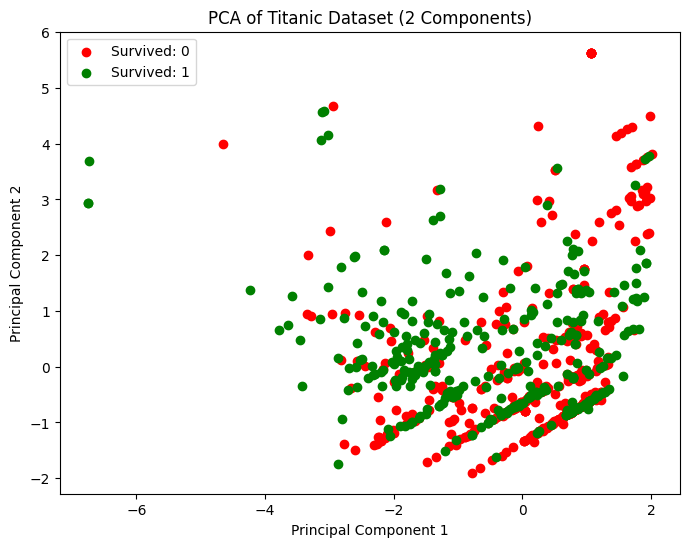

Explained Variance Ratio of Each Component:
[0.3380521  0.32598107]


In [2]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('/content/titanic.csv')

# Select relevant features
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()

# Handle missing values
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].mean())


# Define target variable
y = df['Survived']

# Preprocess data (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Map survival to different colors
survival_map = {0: 'r', 1: 'g'}

# Visualize the reduced features (2D scatter plot)
plt.figure(figsize=(8, 6))
for survival, color in survival_map.items():
    plt.scatter(X_pca[y == survival, 0], X_pca[y == survival, 1], c=color, label=f'Survived: {survival}')

plt.title('PCA of Titanic Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Optional: Explained Variance Ratio
print("Explained Variance Ratio of Each Component:")
print(pca.explained_variance_ratio_)
